In [357]:
% matplotlib notebook
from csxtools.utils import get_fastccd_images, get_images_to_3D
from csxtools.image import stackmean
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skbeam.core.roi as roi
import xray_vision
import xray_vision.mpl_plotting as mpl_plot
from matplotlib import colors
import skbeam.core.correlation as corr
from matplotlib.colors import LogNorm
import time


In [358]:
light = db[118539]
dark0 = db[118540]
dark1 = db[118541]
dark2 = db[118542]


images = get_fastccd_images(light, (dark0, dark1, dark2), flat=None)
stack = get_images_to_3D(images)
mean_stack = stackmean(stack)


/opt/conda_envs/analysis-2018-2.1/lib/python3.6/site-packages/csxtools/utils.py:181: UserWarning: Images and get_images are deprecated. Use Header.data('fccd_image') instead.
  images = header.db.get_images(header, tag)


In [359]:
stack.shape

(600, 960, 1000)

In [360]:
mean_stack.shape

(960, 1000)

In [434]:
csx_tbl = light.table(fill =False,stream_name='baseline')
csx_tbl.columns.values

array(['time', 'slt1_xg', 'slt1_xg_user_setpoint', 'slt1_xc',
       'slt1_xc_user_setpoint', 'slt1_yg', 'slt1_yg_user_setpoint',
       'slt1_yc', 'slt1_yc_user_setpoint', 'nanop_tx',
       'nanop_tx_user_setpoint', 'nanop_tx_dly', 'nanop_tx_rtry',
       'nanop_tx_rdbd', 'nanop_tx_rmod', 'nanop_tx_cnen', 'nanop_tx_pcof',
       'nanop_tx_icof', 'nanop_ty', 'nanop_ty_user_setpoint',
       'nanop_ty_dly', 'nanop_ty_rtry', 'nanop_ty_rdbd', 'nanop_ty_rmod',
       'nanop_ty_cnen', 'nanop_ty_pcof', 'nanop_ty_icof', 'nanop_tz',
       'nanop_tz_user_setpoint', 'nanop_tz_dly', 'nanop_tz_rtry',
       'nanop_tz_rdbd', 'nanop_tz_rmod', 'nanop_tz_cnen', 'nanop_tz_pcof',
       'nanop_tz_icof', 'nanop_bx', 'nanop_bx_user_setpoint',
       'nanop_bx_dly', 'nanop_bx_rtry', 'nanop_bx_rdbd', 'nanop_bx_rmod',
       'nanop_bx_cnen', 'nanop_bx_pcof', 'nanop_bx_icof', 'nanop_by',
       'nanop_by_user_setpoint', 'nanop_by_dly', 'nanop_by_rtry',
       'nanop_by_rdbd', 'nanop_by_rmod', 'nanop_by_cnen

In [435]:
csx_tbl['pgm_energy_setpoint']

seq_num
1    631.0
2    631.0
Name: pgm_energy_setpoint, dtype: float64

<IPython.core.display.Javascript object>


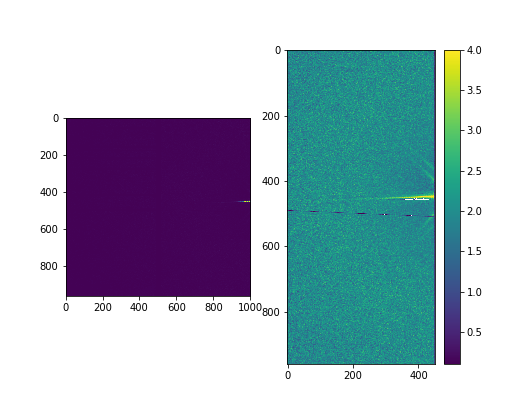

/opt/conda_envs/analysis-2018-2.1/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


In [391]:
mean_stack = stackmean(stack)
fig, ax = plt.subplots(1,2)
csx_im = ax[0].imshow(mean_stack)
csx_im2 =ax[1].imshow(np.log10(mean_stack[0:960,550:1000]),vmin=0.1,vmax=4)
plt.colorbar(csx_im2)



<IPython.core.display.Javascript object>


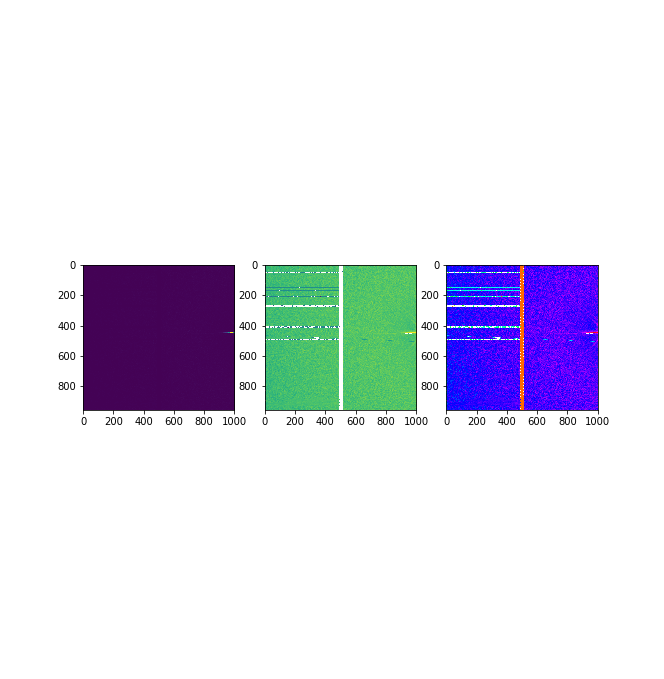

/opt/conda_envs/analysis-2018-2.1/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda_envs/analysis-2018-2.1/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [392]:
fig, ax = plt.subplots(1,3)
csx_im = ax[0].imshow(mean_stack)
csx_im2 =ax[1].imshow(np.log10(mean_stack))
csx_im3=ax[2].imshow(mean_stack, cmap='hsv', interpolation=None, norm=LogNorm())

<IPython.core.display.Javascript object>


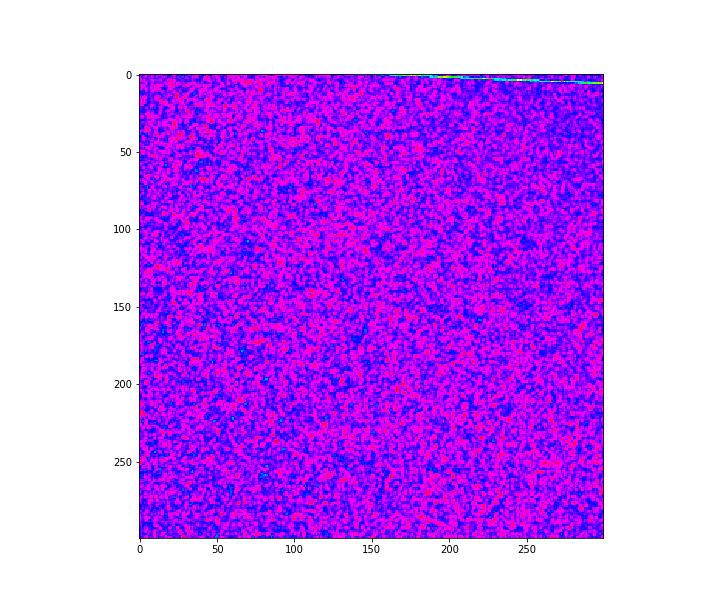

In [414]:
fig, ax = plt.subplots()
csx_im3=ax.imshow(mean_stack[500:800,600:900], cmap='hsv', interpolation=None, norm=LogNorm())

In [436]:
#function for ROI definition

def show_label_array_on_image(ax, image, label_array, set_aspect='auto', cmap=None, imshow_cmap='hsv', norm=LogNorm(), **kwargs):
    im = ax.imshow(image, cmap=imshow_cmap, interpolation=None, norm=norm, **kwargs)
    im_label = mpl_plot.show_label_array(ax, label_array, cmap=cmap, norm=norm, alpha=1, **kwargs)
    return im, im_label
    

In [439]:
roi_edge = (320,330)
label_array = roi.rings(roi_edge, (450, 1050), shape=mean_stack.shape)


<IPython.core.display.Javascript object>


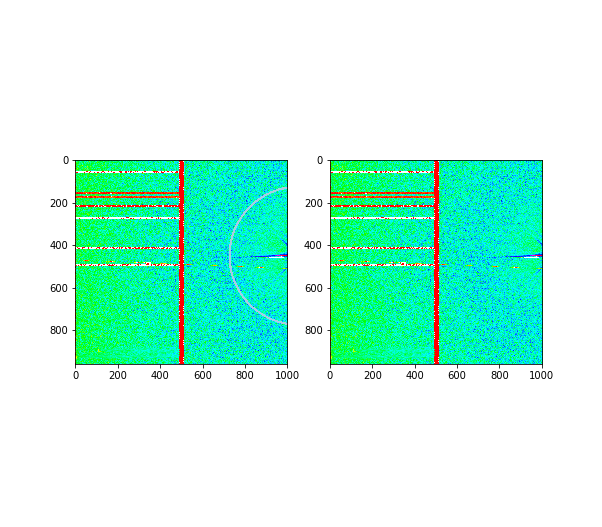

TypeError: Invalid dimensions for image data

In [440]:
#plot_roi(images_sq, label_array)
fig,(ax1,ax2) = plt.subplots(1,2)
show_label_array_on_image(ax1, mean_stack, label_array)
show_label_array_on_image(ax2, mean_stack, label_array=False);


In [425]:
[num_levels, num_bufs] = [10, 26]

In [433]:
#num_levels=how many generations of downsampling to perform(int)
#num_bufs=maximum lag step to compute in each generation of downsampling(int, must be even)
#skbeam.core.correlation.multi_tau_auto_corr(num_levels, num_bufs, labels, images)
#The longest lag time computed is num_levels * num_bufs.
#lag_steps: the times at which the correlation was computed
start_time = time.time()
label = label_array

g2, lag_steps = corr.multi_tau_auto_corr(num_levels, num_bufs, label, stack)

print("--- Time to calculate autocorrelation function: {} seconds ---".format(time.time() - start_time))

--- Time to calculate autocorrelation function: 1.732736587524414 seconds ---


In [427]:
lag_steps

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  56,  60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100,
       104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192, 200,
       208, 224, 240, 256, 272, 288, 304, 320, 336, 352, 368, 384, 400,
       416, 448, 480, 512, 544])

In [428]:
g2[:]

array([[1.76506585],
       [1.6013098 ],
       [1.60058256],
       [1.59992363],
       [1.60043809],
       [1.60094227],
       [1.60115235],
       [1.60120757],
       [1.60080338],
       [1.60101083],
       [1.60055207],
       [1.60133676],
       [1.60120607],
       [1.60115913],
       [1.60038481],
       [1.60070263],
       [1.60017817],
       [1.60057823],
       [1.60089106],
       [1.60098083],
       [1.60074115],
       [1.6005699 ],
       [1.60048837],
       [1.60072217],
       [1.60062758],
       [1.60045011],
       [1.6002463 ],
       [1.60029845],
       [1.59994879],
       [1.60009267],
       [1.59983051],
       [1.59935788],
       [1.59937519],
       [1.59933752],
       [1.59890785],
       [1.59911642],
       [1.59883483],
       [1.59859291],
       [1.59848694],
       [1.59829406],
       [1.59790688],
       [1.59755905],
       [1.59732674],
       [1.59681919],
       [1.59618669],
       [1.59606414],
       [1.59553298],
       [1.595

In [429]:
g2[2]

array([1.60058256])

<IPython.core.display.Javascript object>


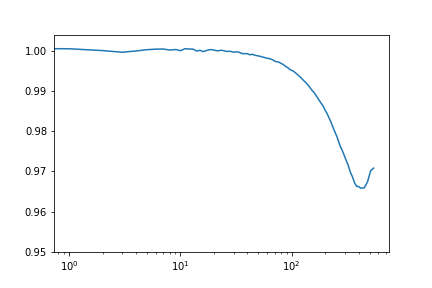

In [442]:
% matplotlib notebook
ax=plt.semilogx(lag_steps * 1 ,g2/g2[10]) ##tbl.fccd_acquire_time.values[0]and g2_t/g2_t[10]
plt.ylim(0.95, 1.004);

<IPython.core.display.Javascript object>


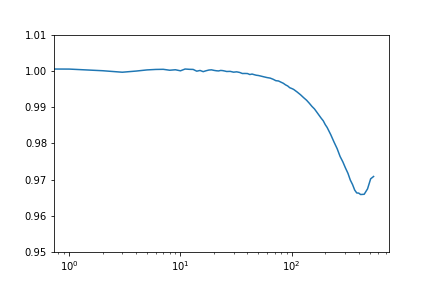

In [441]:
% matplotlib notebook
ax=plt.semilogx(lag_steps, g2/g2[10])
plt.ylim(0.95, 1.01);